In [1333]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [1334]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [1335]:
cars.shape

(1950, 15)

In [1336]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Assemble        1950 non-null   object 
 1   Type            1950 non-null   object 
 2   Km              1950 non-null   int64  
 3   CarColor        1950 non-null   object 
 4   InteriorColor   1950 non-null   object 
 5   CarDoor         1950 non-null   int64  
 6   CarSeat         1950 non-null   int64  
 7   Gearbox         1950 non-null   object 
 8   Price           1950 non-null   int64  
 9   Location        1950 non-null   object 
 10  Status          1950 non-null   object 
 11  EngineCar       1950 non-null   object 
 12  Capacity        1950 non-null   float64
 13  Trademark       1950 non-null   object 
 14  ProductionYear  1950 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 228.6+ KB


# Visualing data 


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


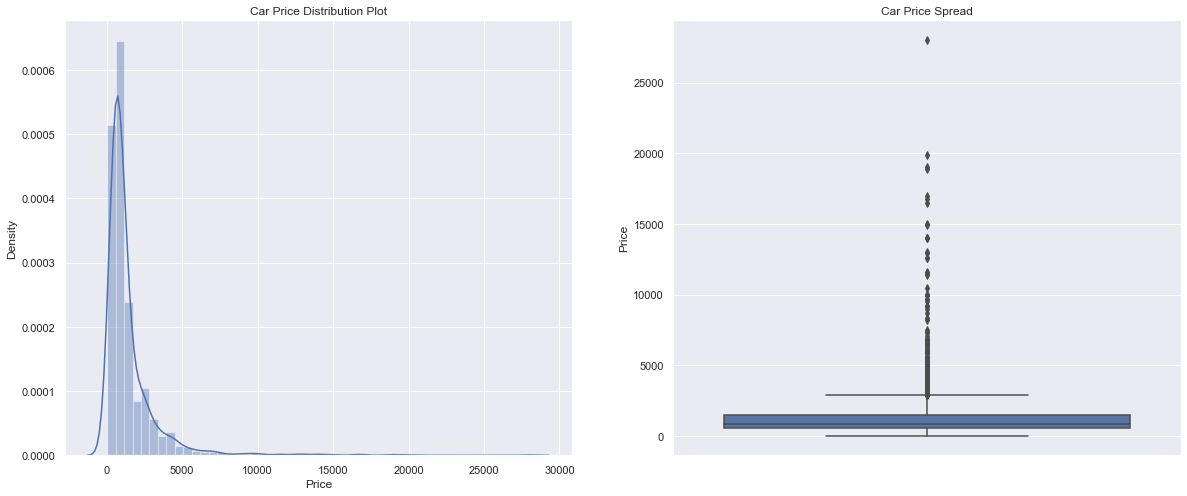

In [1337]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

Giá hầu như bị lệch phải, giá toàn bộ xe oto có trong dataset đều dưới 5 tỷ đồng.

Giá trị outlie khá nhiều, nhưng đó là quan trọng.

Các Categorical Data:
---
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

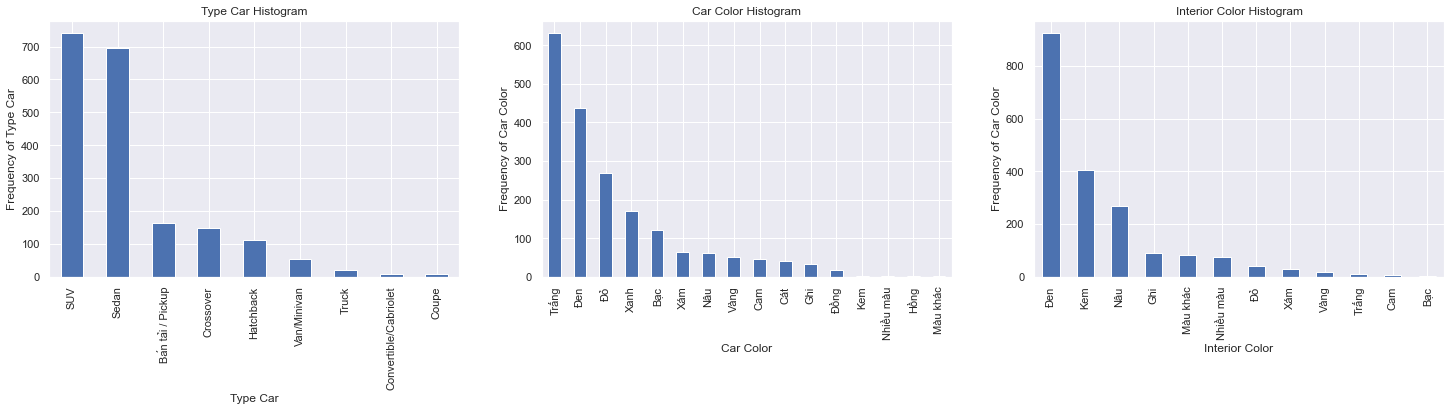

In [1338]:
plt.figure(figsize=(25, 16))

plt.subplot(331)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(332)
plt1 = cars.CarColor.value_counts().plot(kind = 'bar')
plt.title('Car Color Histogram')
plt1.set(xlabel = 'Car Color', ylabel='Frequency of Car Color')

plt.subplot(333)
plt1 = cars.InteriorColor.value_counts().plot(kind = 'bar')
plt.title('Interior Color Histogram')
plt1.set(xlabel = 'Interior Color', ylabel='Frequency of Car Color')

plt.show()


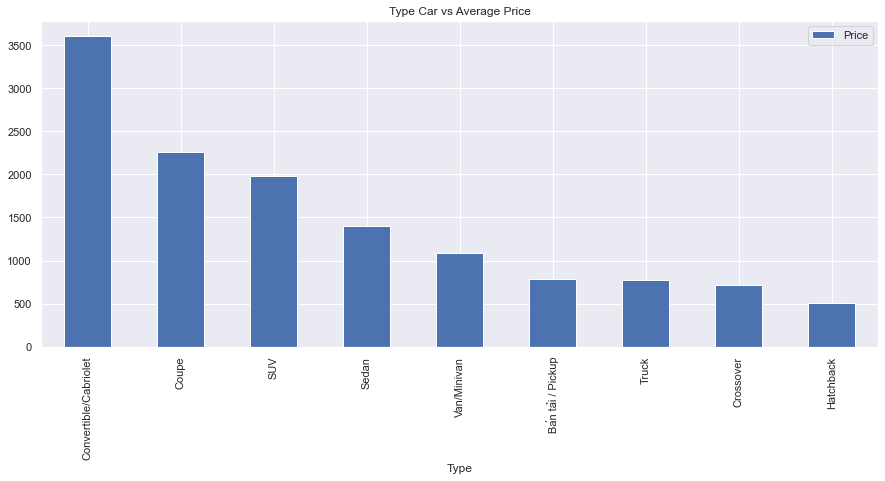

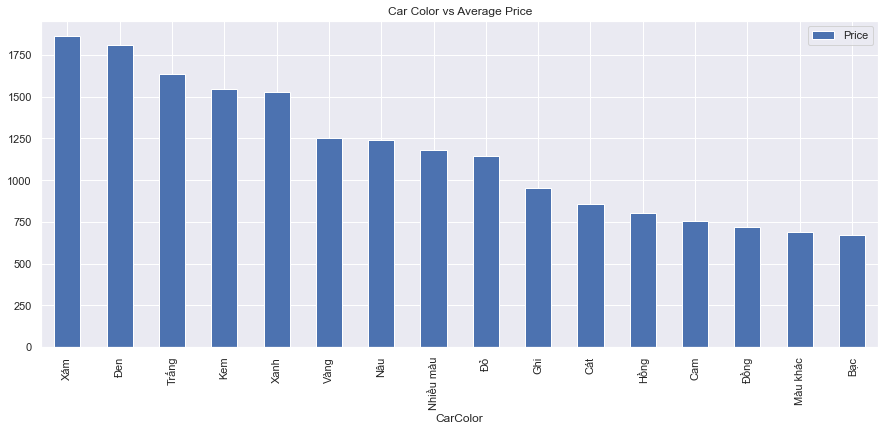

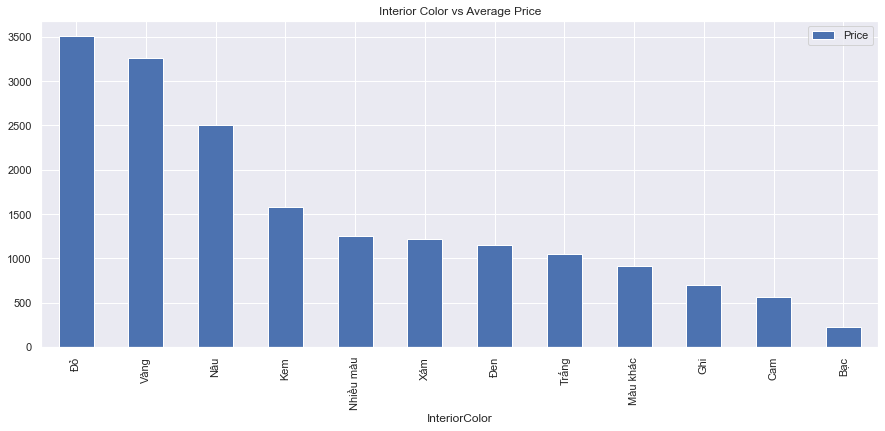

In [1339]:
df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Type Car vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['CarColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Car Color vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['InteriorColor'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Interior Color vs Average Price')
plt.show()

KL:
1. SUV là loại xe được ưa chuộng nhiều nhất.
2. Màu xe trắng là màu được đăng bán nhiều nhất, nhưng mức giá của màu ô tô xám là cao nhất.
3. Màu nội thắng màu đen được ưa chuộng nhiều nhất, nhưng mức giá của màu đỏ là cao nhất.

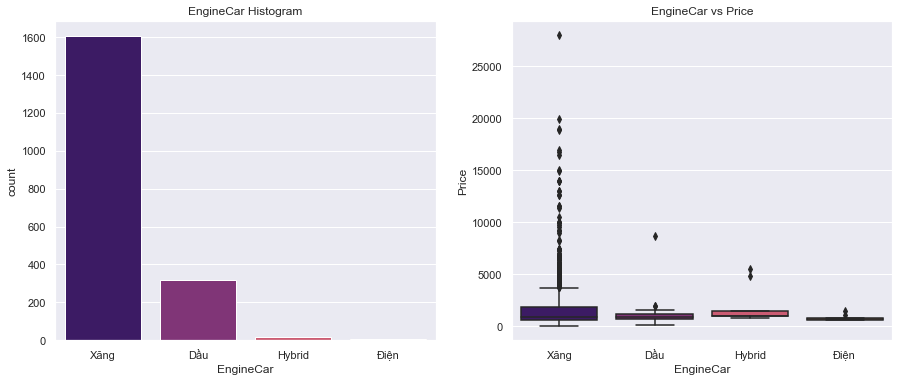

In [1340]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))
plot_count('EngineCar', 1)


 Kết luận:
- Loại xe chạy bằng nhiên liệu xăng được ưa chuộng nhiều nhất, sau đó đến dầu.
- Xe chạy bằng xăng cũng có mức giá bán cao nhất trong các loại.
- Hybrid cũng là loại nhiên liệu có mức giá cao, nên không được chuộng.
- Xe điện là loại xe mới gần đây nên có ít điều kiện thuận lợi để sử dụng (nơi tiếp nguyên liệu, sửa chữa) nên tuy là rẻ nhất nhưng ít người sử dụng.

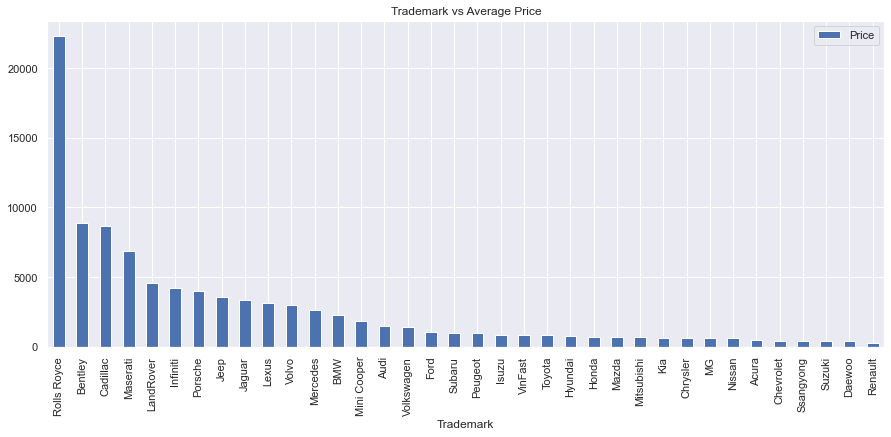

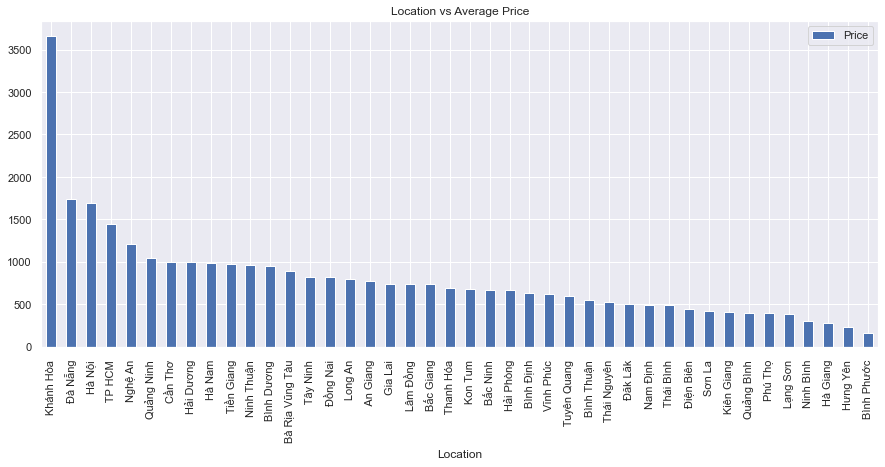

In [1341]:
df = pd.DataFrame(cars.groupby(['Trademark'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))

plt.title('Trademark vs Average Price')
plt.show()


df = pd.DataFrame(cars.groupby(['Location'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(15,6))
plt.title('Location vs Average Price')
plt.show()


Kết luận:
- Dòng xe của hãng Rolls Royce có mức giá rất cao.
- Tỉnh Khánh Hòa là nơi có mức giá bán xe cao nhất.
- Đà Nẵng - Hà Nội - HCM là 3 nơi có mức giá bán cao ngang nhau sau tỉnh Khánh Hòa. Trong khi các nơi khác mức giá không chênh lệch nhiều.

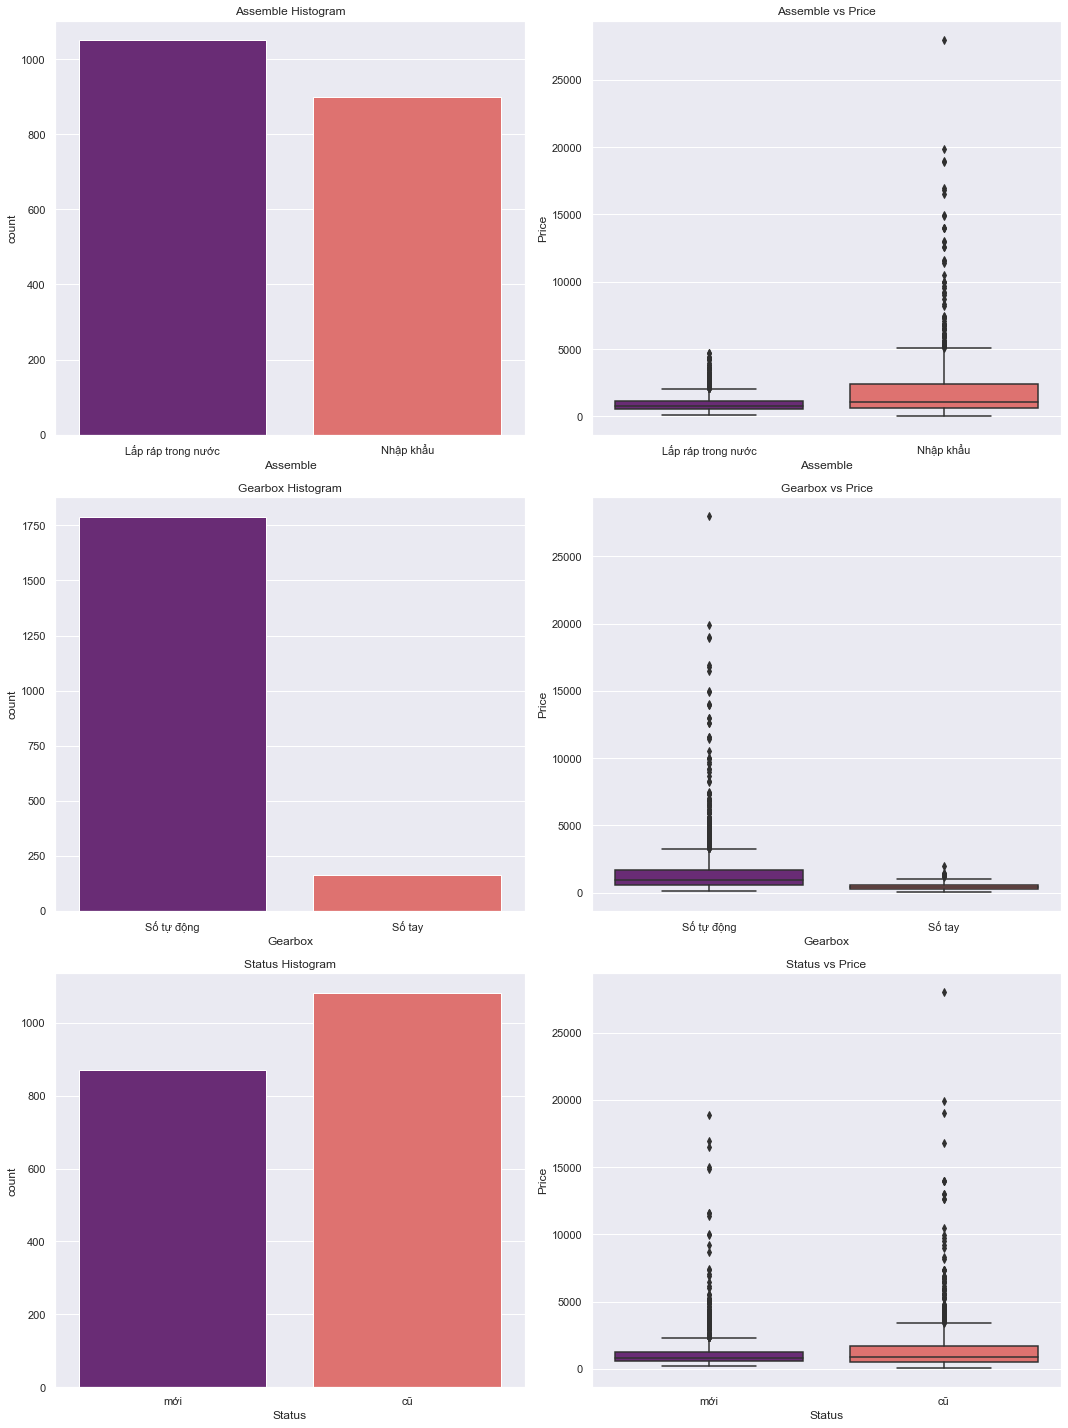

In [1342]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(3,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.Price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('Assemble', 1)
plot_count('Gearbox', 3)
plot_count('Status', 5)


plt.tight_layout()

Kết luận:
- Loại xe nhập khẩu có mức giá bán cao hơn loại lắp ráp trong nước. Nên loại lắp ráp trong nước được nhiều người bán hơn.
- Tuy loại xe số tự động có giá bán cao hơn loại xe số tay nhưng được nhiều người ưa chuộng bởi sự sang trọng và tiện dụng của nó. Đặc biệt là đối với nữ.
- Loại xe mới hoặc cũ không ảnh hưởng quá nhiều tới giá xe. 
- Có thể thấy rõ không có nhiều sự khác biệt giữa 2 loại này. Dù vẫn có ngoại lệ ở loại xe cũ nhưng không đáng kể.


Numeric Data
---
- Km
- CarDoor
- CarSeat
- Capacity
- ProductionYear

In [1343]:
NummericData = [ "Km","CarDoor","CarSeat","Capacity","ProductionYear", "Price"]

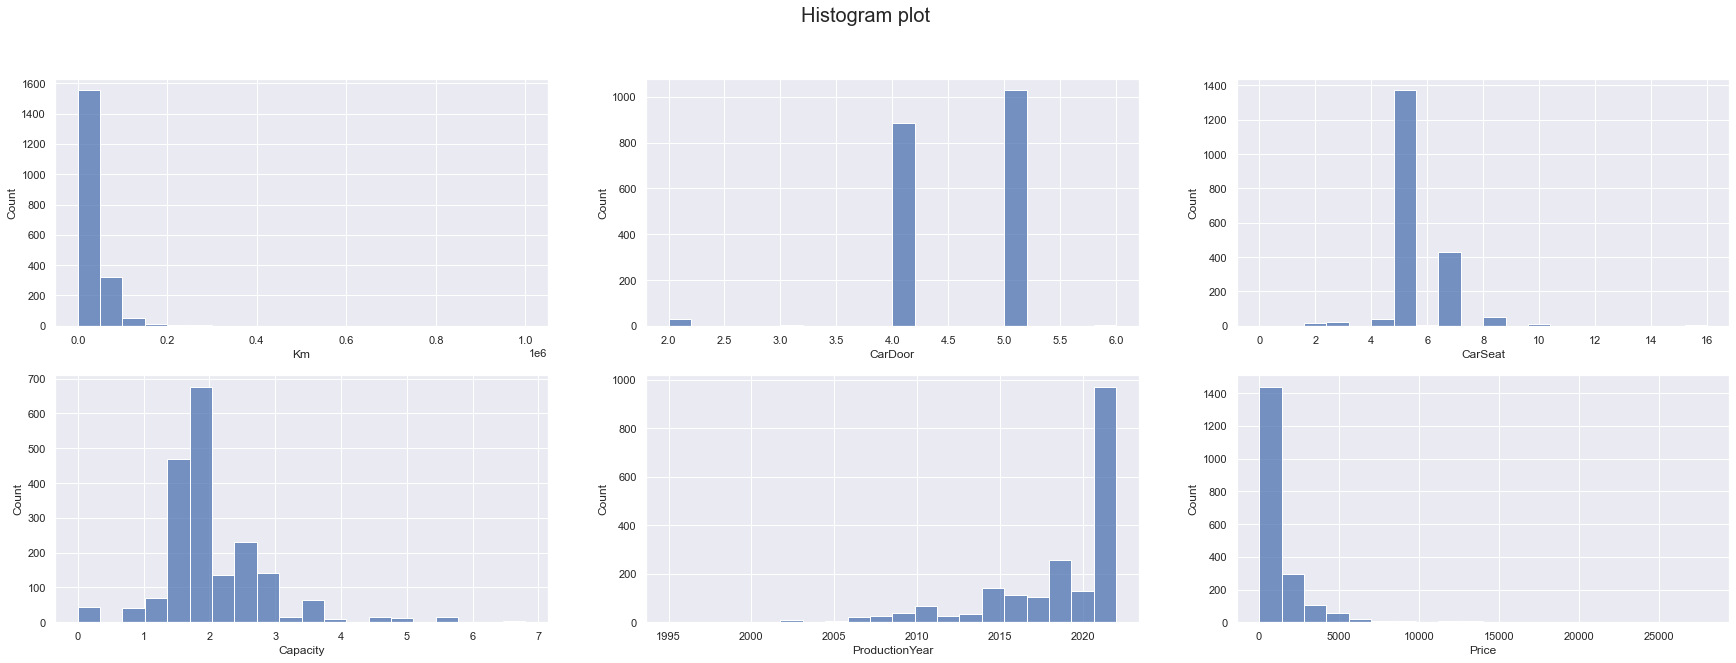

In [1344]:
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,3, i[0]+1)
    # axe.set(title = f"Median: {cars[i[1]].median()}")
    # axe.axvline(cars[i[1]].median(), color = 'black', linestyle = '--')
    sns.histplot(x=cars[i[1]], ax = axe, bins=20)

Capacity là dung tích chứa nhiên liệu của xe, ở đây có một số giá trị bằng 0, đó là dữ liệu sai. Do đó tiến hành thay thế bằng giá trị mean của đặc trưng.

In [1345]:
WrongCapa = (cars["Capacity"] == 0)
#Thay cac ngoai le thanh gia tri nan
cars.loc[WrongCapa,'Capacity'] = np.nan
#Thay gia tri trong bang gia tri mean cua dac trung
cars['Capacity'] = cars['Capacity'].fillna(cars['Capacity'].mean())

Text(0.5, 1.0, 'Histogram of Price')

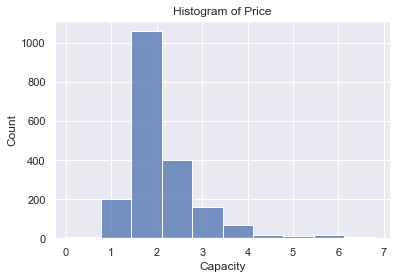

In [1346]:
ax = sns.histplot( data  = cars['Capacity'] ,palette='Blues_r', bins=10)
ax.set_title('Histogram of' + ' ' + i[1])

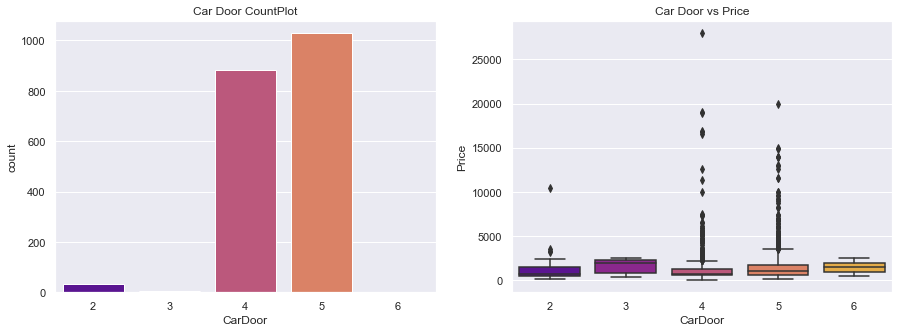

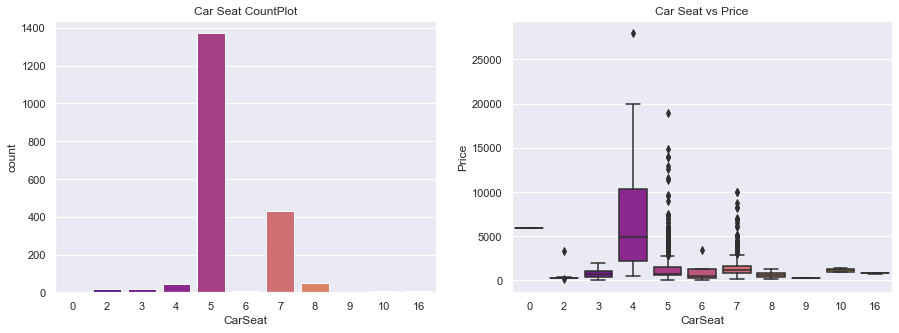

In [1347]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Door CountPlot')
sns.countplot(x= cars.CarDoor, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Door vs Price')
sns.boxplot(x=cars.CarDoor, y=cars.Price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Seat CountPlot')
sns.countplot(x=cars.CarSeat, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Car Seat vs Price')
sns.boxplot(x=cars.CarSeat, y=cars.Price, palette=("plasma"))

plt.show()

Kết luận:
- Số lượng xe 4 và 5 cửa được ưa chuộng nhiều nhất. Các loại xe 3 và 6 do giá thành cao nên ít được bán.
- Loại chỗ 5 và 7 được ưa chuộng nhiều nhất. Tuy nhiên loại xe 4 chỗ ngồi lại có tầm giá cao nhất.

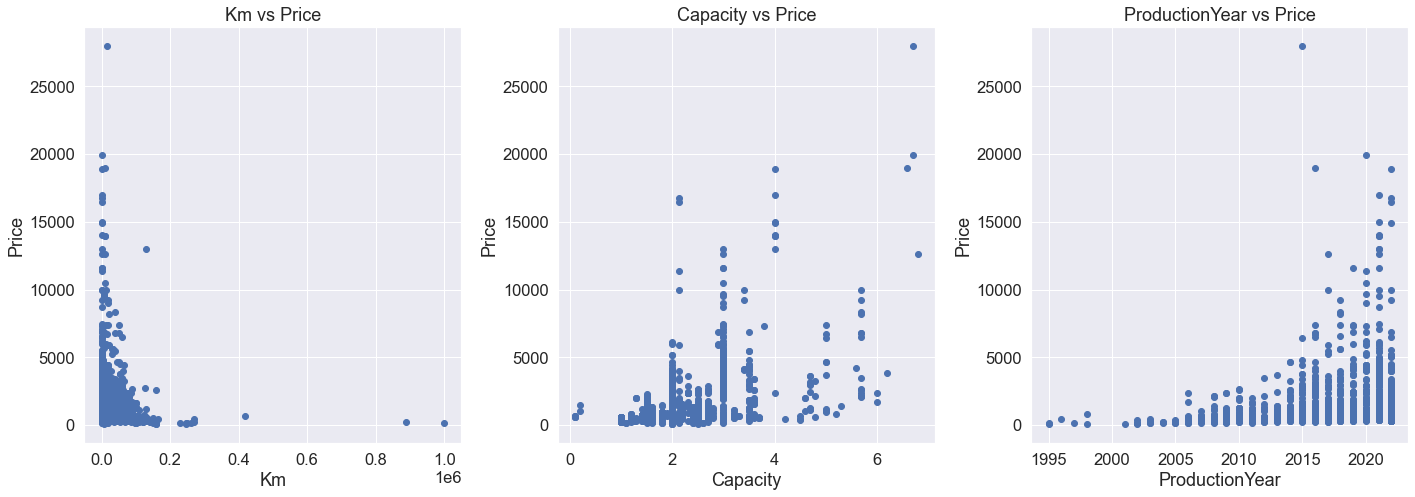

In [1348]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(cars[x],cars['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Km', 1)
scatter('Capacity', 2)
scatter('ProductionYear', 3)

plt.tight_layout()

Kết luận:
- Số km đã chạy của ô tô ảnh hưởng tiêu cực tới giá tiền.
- Giá xe bán qua từng năm có sự tương quan tích cực tới giá tiền, đặc biệt từ khoảng năm 2015 đến nay.
- Xe có dung tích xăng càng lớn, giá xe càng cao nhưng số lượng bán ít. Xe có dung tích xăng bán nhiều tập trung ở giá trị 2 đến 4.

Tương quan giữa các biến Nummeric và với Price

[Text(0, 0.5, 'Km'),
 Text(0, 1.5, 'CarDoor'),
 Text(0, 2.5, 'CarSeat'),
 Text(0, 3.5, 'Capacity'),
 Text(0, 4.5, 'ProductionYear'),
 Text(0, 5.5, 'Price')]

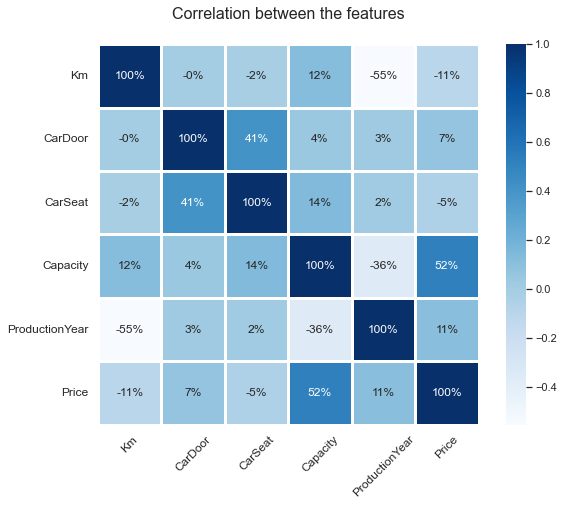

In [1349]:
fig=plt.figure(figsize=(10,7))
sns.set(font_scale = 1)
axis=sns.heatmap(cars[NummericData].corr(), annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")

axis.set_title('Correlation between the features', fontsize=16, y=1.05)
axis.set_xticklabels(NummericData, fontsize=12, rotation = 45)
axis.set_yticklabels(NummericData, fontsize=12, rotation= 0)

Dung tích xăng của xe có sự tương quan tích cực với giá xe nhưng lại tương quan tiêu cực với năm sản xuất.

Số km đã đi của xe có tương quan tiêu cực tới năm sản xuất, do xe càng mới sản xuất thì số km đã đi càng ít, có thể là chưa đi.

Vì thế, loại bỏ đặc trưng km để tiến hành xây dựng model

Các đặc trưng có ảnh hưởng tới giá tiền (Price) sau khi đã trực quan hóa dữ liệu:
---

- Status
- ProductionYear
- CarColor
- CarSeat
- CarType
- CarDoor
- EngineCar
- Gearbox
- Assemble
- Interior Color
- Capacity

In [1350]:
cars_lr = cars[['Price', 'ProductionYear','CarColor', 'CarSeat','CarDoor', 'Type',
                  'EngineCar', 'Gearbox', 'Assemble', 'InteriorColor', 'Capacity', 'Status']]
cars_lr.head()

,Price,ProductionYear,CarColor,CarSeat,CarDoor,Type,EngineCar,Gearbox,Assemble,InteriorColor,Capacity,Status
0,2049,2022,Trắng,5,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Kem,2.0,mới
1,1989,2022,Trắng,7,5,SUV,Xăng,Số tự động,Nhập khẩu,Màu khác,1.3,mới
2,1083,2022,Xanh,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Đen,1.5,mới
3,925,2022,Đỏ,5,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,mới
4,2879,2021,Đen,5,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,cũ


In [1351]:
cars_lr.head()

,Price,ProductionYear,CarColor,CarSeat,CarDoor,Type,EngineCar,Gearbox,Assemble,InteriorColor,Capacity,Status
0,2049,2022,Trắng,5,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Kem,2.0,mới
1,1989,2022,Trắng,7,5,SUV,Xăng,Số tự động,Nhập khẩu,Màu khác,1.3,mới
2,1083,2022,Xanh,7,5,SUV,Xăng,Số tự động,Lắp ráp trong nước,Đen,1.5,mới
3,925,2022,Đỏ,5,5,Crossover,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,mới
4,2879,2021,Đen,5,4,Sedan,Xăng,Số tự động,Lắp ráp trong nước,Đen,2.0,cũ


In [1352]:
cars_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           1950 non-null   int64  
 1   ProductionYear  1950 non-null   int64  
 2   CarColor        1950 non-null   object 
 3   CarSeat         1950 non-null   int64  
 4   CarDoor         1950 non-null   int64  
 5   Type            1950 non-null   object 
 6   EngineCar       1950 non-null   object 
 7   Gearbox         1950 non-null   object 
 8   Assemble        1950 non-null   object 
 9   InteriorColor   1950 non-null   object 
 10  Capacity        1950 non-null   float64
 11  Status          1950 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 182.9+ KB


# Label Encoding các đặc trưng Catalogy

In [1353]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('CarColor',cars_lr)
cars_lr = dummies('Type',cars_lr)
cars_lr = dummies('EngineCar',cars_lr)
cars_lr = dummies('Gearbox',cars_lr)
cars_lr = dummies('Assemble',cars_lr)
cars_lr = dummies('InteriorColor',cars_lr)
cars_lr = dummies('Status',cars_lr)


# Chia các tập Train/Test

In [1354]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(cars_lr,  train_size = 0.8, test_size = 0.2, random_state=42)

In [1355]:
df_train.shape

(1560, 45)

In [1356]:
df_test.shape

(390, 45)

# Outlier Handling


### Khảo sát

<AxesSubplot:>

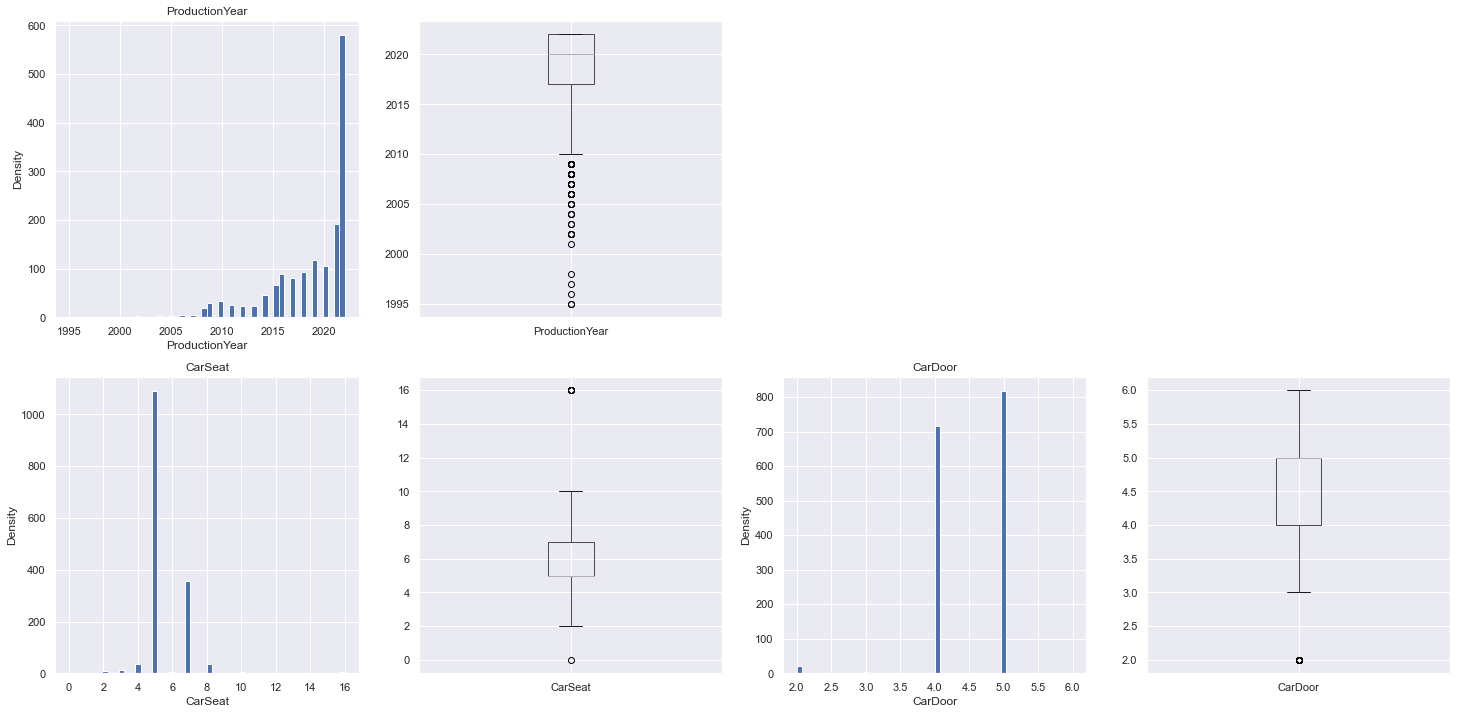

In [1358]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=df_train.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
df_train.boxplot(column="ProductionYear")

# plt.subplot(2,4,3)
# figure=df_train.Km.hist(bins=50)
# figure.set_title('Km')
# figure.set_xlabel('Km')
# figure.set_ylabel('Density')
# plt.subplot(2,4,4)
# df_train.boxplot(column="Km")

plt.subplot(2,4,5)
figure=df_train.CarSeat.hist(bins=50)
figure.set_title('CarSeat')
figure.set_xlabel('CarSeat')
figure.set_ylabel('Density')
plt.subplot(2,4,6)
df_train.boxplot(column="CarSeat")

plt.subplot(2,4,7)
figure=df_train.CarDoor.hist(bins=50)
figure.set_title('CarDoor')
figure.set_xlabel('CarDoor')
figure.set_ylabel('Density')
plt.subplot(2,4,8)
df_train.boxplot(column="CarDoor")



Kết luận:
- Có thể thấy đặc trưng ProductionYear có nhiều giá trị ngoại lệ lệch dưới và đặc trưng Km cũng có nhiều giá trị ngoại lệ lệch trên.
- Trong khi đó đặc trưng CarSeat và CarDoor không có nhiều giá trị ngoại lệ.

=> Nên ta xử lý ngoại lệ cho 2 đặc trưng ProductionYear và Km.


### Áp dụng xử lý ngoại lệ

In [1359]:
cars_outlier = df_train.copy()

# #Km
# IQR = cars_outlier.Km.quantile(0.75)-cars_outlier.Km.quantile(0.25)
# # lower_bridge=cars_outlier['Km'].quantile(0.25)-(IQR*3)
# upper_bridge = cars_outlier['Km'].quantile(0.75)+(IQR*3)

# cars_outlier.loc[cars_outlier['Km'] >= round(upper_bridge), 'Km'] = round(upper_bridge)

#ProductionYear
IQR = cars_outlier.ProductionYear.quantile(0.75) - cars_outlier.ProductionYear.quantile(0.25)
lower_bridge = cars_outlier['ProductionYear'].quantile(0.25)-(IQR*3)
cars_outlier.loc[cars_outlier['ProductionYear'] < round(lower_bridge), 'ProductionYear'] = round(lower_bridge)


### Kết quả xử lý ngoại lệ

<AxesSubplot:>

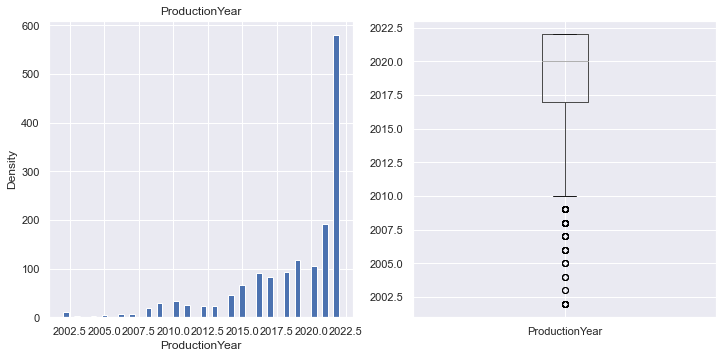

In [1360]:
plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
figure=cars_outlier.ProductionYear.hist(bins=50)
figure.set_title('ProductionYear')
figure.set_xlabel('ProductionYear')
figure.set_ylabel('Density')
plt.subplot(2,4,2)
cars_outlier.boxplot(column="ProductionYear")

# plt.subplot(2,4,3)
# figure=cars_outlier.Km.hist(bins=50)
# figure.set_title('Km')
# figure.set_xlabel('Km')
# figure.set_ylabel('Density')
# plt.subplot(2,4,4)
# cars_outlier.boxplot(column="Km")

-> Một số giá trị lệch quá cao và quá thấp đã được xử lý, mặc dù vẫn còn nhiều giá trị nằm ngoài mức phân bố.

# Chuẩn hóa

In [1361]:
# Có xử lý ngoại lệ
X_train = cars_outlier.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (1560, 45)
X_test: (390, 45)


In [1172]:
# # Không xử lý ngoại lệ
# X_train = df_train.copy()
# X_test = df_test.copy()

# print("X_train: {0}".format(X_train.shape))
# print("X_test: {0}".format(X_test.shape))

## Tách đặc trưng taget (Price)

In [1362]:
y_train = X_train.pop("Price")
y_test = X_test.pop("Price")
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (1560,)
y_test: (390,)


In [1103]:
# from sklearn.preprocessing import MinMaxScaler

# def min_max_scaler(df):
#     scaler = MinMaxScaler()
#     df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
#     return df_scaled

In [1363]:
# Chuẩn hóa StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc = MinMaxScaler()
X_train_norm = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_norm = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
# X_test_norm = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

In [1364]:
X_train_norm.head()

,ProductionYear,CarSeat,CarDoor,Capacity,Cam,Cát,Ghi,Hồng,Kem,Màu khác,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,-0.386270,-0.430995,-0.850143,1.355181,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,5.088865,-0.39549,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,-0.896364
1,0.561185,-0.430995,-0.850143,0.092863,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
2,-0.149406,-0.430995,-0.850143,0.850254,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
3,0.798048,-0.430995,-0.850143,-0.159601,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,1.115618
4,-0.149406,-0.430995,0.865540,1.102717,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,-0.969690,7.141428,-0.896364


In [1365]:
X_test_norm.head()

,ProductionYear,CarSeat,CarDoor,Capacity,Cam,Cát,Ghi,Hồng,Kem,Màu khác,...,Kem,Màu khác,Nhiều màu,Nâu,Trắng,Vàng,Xám,Đen,Đỏ,mới
0,-0.149406,-0.430995,-0.850143,0.471558,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
1,-1.096861,-0.430995,-0.850143,-0.159601,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,2.52851,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,-0.896364
2,0.798048,-0.430995,0.865540,-0.664528,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,2.52851,-0.062137,-0.088045,-0.122328,-0.969690,-0.140028,1.115618
3,-0.386270,-0.430995,0.865540,-0.159601,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364
4,-0.859997,-0.430995,-0.850143,1.102717,-0.142389,-0.151495,-0.130189,-0.025327,-0.035829,-0.025327,...,-0.510995,-0.215122,-0.196507,-0.39549,-0.062137,-0.088045,-0.122328,1.031258,-0.140028,-0.896364


# Xây dựng Model (RandomForestRegressor)

In [1366]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=123)

In [1367]:
predictions = model_RD.predict(X_test_norm)

In [1368]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))

758.1092332822191

In [1369]:
from sklearn.metrics import r2_score 
model_RD.score(X_test_norm,y_test)

0.8426657137342625

In [1370]:
from sklearn.metrics import r2_score 
r2_score(y_test,predictions)

0.8426657137342625

In [1371]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 428.7226975027787
Fold: 1 : rmse = 990.9719453207047
Fold: 2 : rmse = 515.46555560341
Fold: 3 : rmse = 631.8730704888789
Fold: 4 : rmse = 768.9291455826074
Fold: 5 : rmse = 831.4606176609801
Fold: 6 : rmse = 621.8263367147815
Fold: 7 : rmse = 2042.374345967456
Fold: 8 : rmse = 1171.0894715450315
Fold: 9 : rmse = 593.7618728677393


Cross-Validation:
 mean 859.6475059254368 
 std: 447.8171483241592


In [1372]:

rs = {
  "SalePrice_Test": y_test[:10],
  "SalePrice_Predict": predictions[:10]
}

df = pd.DataFrame(rs)
print(df)

print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions)**0.5))

      SalePrice_Test  SalePrice_Predict
1614             660         638.572500
1405             825         764.290000
974             1020        1010.290000
1055            1779        1692.160000
307             2350        3064.235000
432             2850        2111.470000
1466            1303        1069.430357
598              541         550.308286
1173             846         810.117333
305              609         691.197500
Mean Y_test: 1420.551282051282
rmse: 758.1092332822191


# Tìm siêu tham số cho Model

In [1414]:
# Number of trees in random forest
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
}
bootstrap = ['True', 'False']
# Create the random grid
random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [1415]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid,
#                            cv=3, n_jobs=-1, verbose=2)
# # Fit the grid search to the data
# grid_fit = grid_search.fit(X_train_norm, y_train)
# best_parameters = grid_fit.best_params_
# best_parameters

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Áp dụng siêu tham số vào model

In [1419]:
model_RD1 = RandomForestRegressor(random_state=123, n_estimators=100, bootstrap=False, max_depth=50, max_features='auto', min_samples_leaf=1, min_samples_split=2)
model_RD1.fit(X_train_norm, y_train)
predictions = model_RD1.predict(X_test_norm)

In [1420]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictions))


635.2065893176425

In [1421]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train_norm, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_RD.fit(X_train_norm.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_RD.predict(X_train_norm.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 431.8164692882404
Fold: 1 : rmse = 1017.1561783512342
Fold: 2 : rmse = 515.6056106674381
Fold: 3 : rmse = 630.4549430153546
Fold: 4 : rmse = 767.0119889668399
Fold: 5 : rmse = 833.6832045356367
Fold: 6 : rmse = 617.31550635218
Fold: 7 : rmse = 2043.29575842957
Fold: 8 : rmse = 1172.2127061161325
Fold: 9 : rmse = 588.4425206763796


Cross-Validation:
 mean 861.6994886399007 
 std: 449.32760254307743


In [1422]:
predictions1 = model_RD1.predict(X_test_norm)


rs = {
  "SalePrice_Test": y_test[:10],
  "SalePrice_Predict": predictions[:10]
}

df = pd.DataFrame(rs)
print(df)

print("Mean Y_test: {0}".format(np.mean(y_test)))
print("rmse: {0}".format(mean_squared_error(y_test,predictions)**0.5))

      SalePrice_Test  SalePrice_Predict
1614             660         667.740000
1405             825         783.640000
974             1020        1020.000000
1055            1779        1119.940000
307             2350        2350.000000
432             2850        2588.000000
1466            1303        1033.000000
598              541         565.333333
1173             846         800.000000
305              609         575.000000
Mean Y_test: 1420.551282051282
rmse: 635.2065893176425


Đánh giá r2_score

In [1423]:
from sklearn.metrics import r2_score 
r2_score(y_test,predictions1)

0.8895438780505172

Text(0, 0.5, 'y_pred')

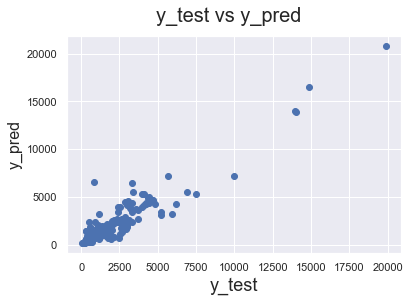

In [1424]:
fig = plt.figure()
plt.scatter(y_test,predictions1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Biểu đồ cho thấy sự đồng biến giữa y_test và y_pred của mô hình randomforestregressor

# LinearRegression

In [1254]:
from sklearn.linear_model import LinearRegression


model_LR = LinearRegression()
model_LR.fit(X_train_norm, y_train)

LinearRegression()

In [1255]:
predictions = model_LR.predict(X_test_norm)

In [1256]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))

1295.369577657623

In [117]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)
kfold = kfold.split(X_train, y_train)
rmses = []

for k, (i_train, i_test) in enumerate(kfold):
    model_LR.fit(X_train.iloc[i_train, :], y_train.iloc[i_train])
    rmse = mean_squared_error( y_train.iloc[i_test],model_LR.predict(X_train.iloc[i_test, :]))**0.5
    rmses.append(rmse)
    print('Fold: {0} : rmse = {1}'.format(k,rmse))
 
print('\n\nCross-Validation:\n mean {0} \n std: {1}'.format(np.mean(rmses), np.std(rmses)))

Fold: 0 : rmse = 0.0721357851853279
Fold: 1 : rmse = 0.053343220139569186
Fold: 2 : rmse = 0.04535205188812855
Fold: 3 : rmse = 110327283604.80928
Fold: 4 : rmse = 0.04094848441114174
Fold: 5 : rmse = 0.07652343239940822
Fold: 6 : rmse = 0.055198663998203966
Fold: 7 : rmse = 0.05198919375997085
Fold: 8 : rmse = 0.0673780954256687
Fold: 9 : rmse = 0.042736097448168385


Cross-Validation:
 mean 11032728360.531488 
 std: 33098185081.42593
